In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from pyjoystick.sdl2 import Key, Joystick, run_event_loop
from pprint import pprint
from threading import Thread
import time
import serial
from sklearn import linear_model

In [73]:
cap = cv2.VideoCapture(0)
# set blue thresh
lower_green = np.array([35,70,60])
upper_green = np.array([120,255,255])

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx = 1, fy = 1, interpolation = cv2.INTER_AREA)
    cv2.imshow('frame', frame)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    # edges = cv2.Canny(mask, 100, 200)
    cv2.imshow('green edges', mask)
    if (cv2.waitKey(30) == 27):
        break

cap.release()
cv2.destroyAllWindows()

In [74]:
edges = mask

In [76]:
greenpos0 = []
greenpos1 = []
for (index0,liste) in enumerate(edges):
    for (index1,value) in enumerate(liste):
        if value == 255:
            greenpos0.append(index0)
            greenpos1.append(index1)
            # print(value)

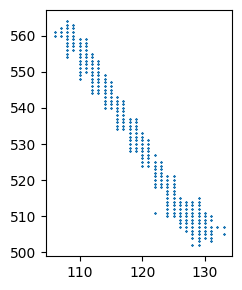

In [77]:
plt.figure(figsize = (2.4, 3.2))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

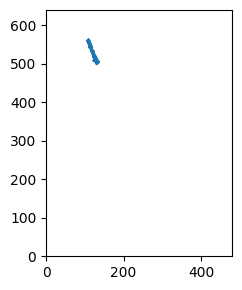

In [78]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

In [79]:
ransac = linear_model.RANSACRegressor()
ransac.fit(np.array(greenpos0).reshape(-1, 1), np.array(greenpos1).reshape(-1, 1))

line_X = np.arange(min(greenpos0), max(greenpos0) + 1)[:, np.newaxis]
line_y = ransac.predict(line_X)

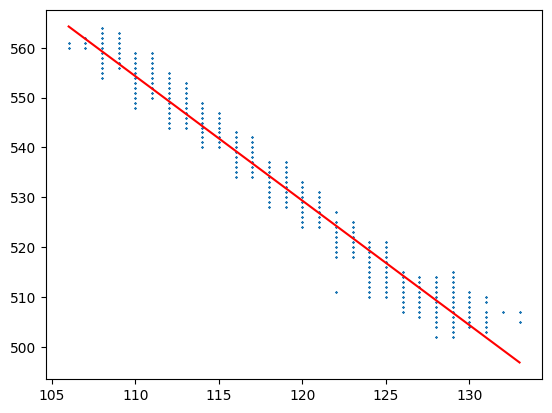

In [80]:
# plt.figure(figsize = (4.8, 6.4))
# plt.xlim((0, 480))
# plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

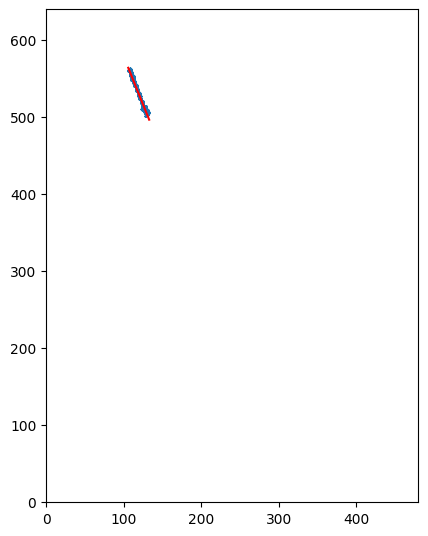

In [81]:
plt.figure(figsize = (4.8, 6.4))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

In [82]:
inlier_mask = ransac.inlier_mask_

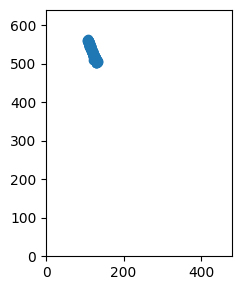

In [83]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(np.array(greenpos0).reshape(-1, 1)[inlier_mask], np.array(greenpos1).reshape(-1, 1)[inlier_mask])

In [84]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][-1,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][-1,0]))

524.1545573588004

In [85]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][0,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]))

569.9438568841672

In [88]:
np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]

560

In [2]:
Servo_t = [0, 29.85799098, 87.28123918, 49.99237628, 23.27381264], [54.25188891, 14.62139926, 51.21600907, 64.9204633, 113.30784031]

A_t = [[-0.96566657, 0.49763318, 0.95705414, -0.62148105, -0.44530939], [0.90419815, -0.66050816, 0.60991016, 0.22840757, 0.80645628]]

s_t = [[391, 402, 363, 365, 325], [360, 320, 441, 434, 471]]

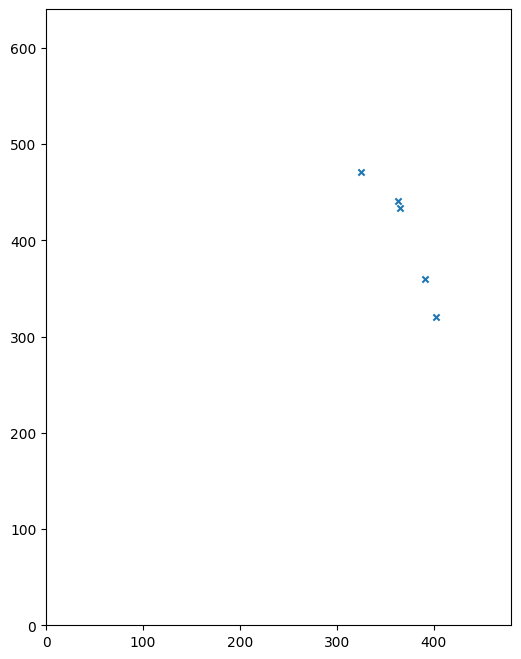

In [13]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

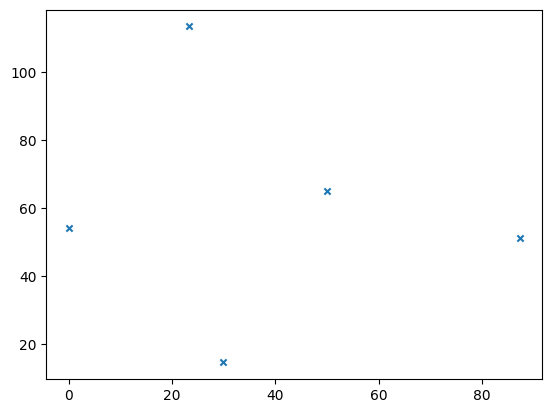

In [14]:
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')

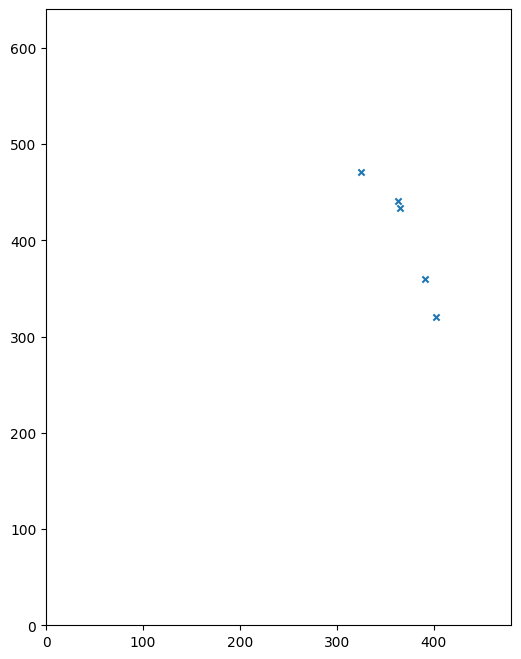

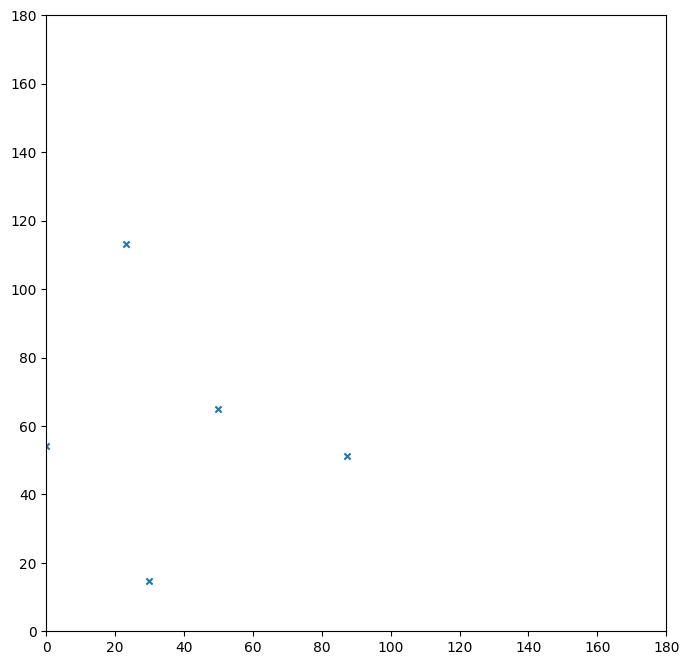

In [16]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

plt.figure(figsize = (8, 8))
plt.xlim((0, 180))
plt.ylim((0, 180))
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')
plt.show()

In [14]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
print(ret)
if ret :
    print(ret)
    cv2.imwrite('./first_frame.jpg', frame)
    # cv2.imshow('test', frame)

# cap.release()
# cv2.destroyAllWindows()

True
True


### Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('./data.npy', 'rb') as f:
    Servo_t = np.load(f)
    A_t = np.load(f)
    s_t = np.load(f)
    
print(np.shape(Servo_t), np.shape(A_t), np.shape(s_t))

(2, 1112) (2, 1112) (2, 1113)


In [4]:
s_t[0, 0], s_t[1, 0]

(431, 191)

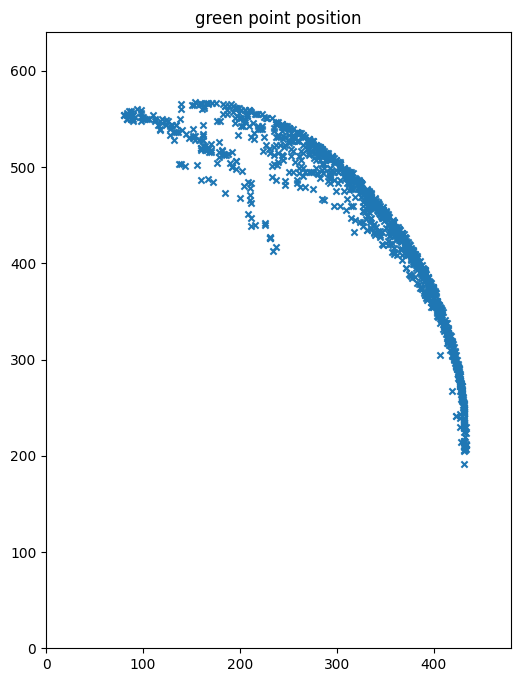

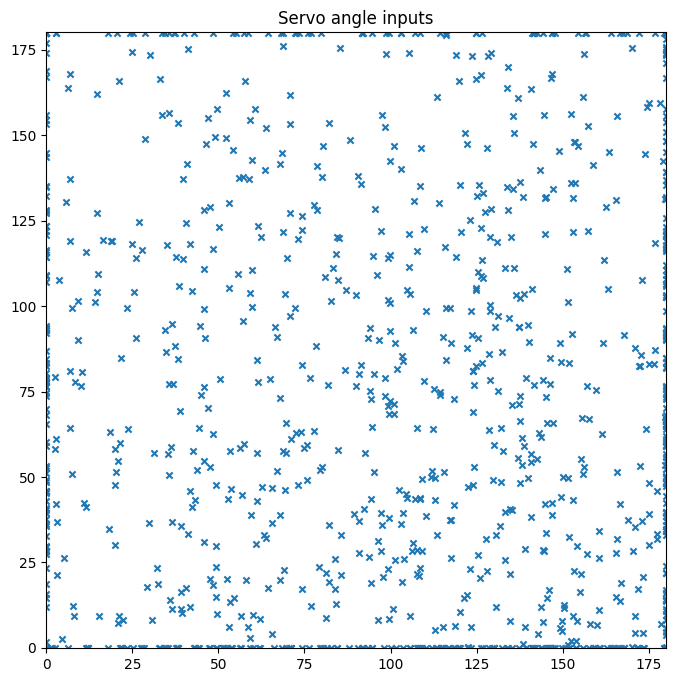

In [5]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.title('green point position')
# plt.plot(s_t[0], s_t[1])
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

plt.figure(figsize = (8, 8))
plt.xlim((-0.1, 180.1))
plt.ylim((-0.1, 180.1))
# plt.plot(Servo_t[0], Servo_t[1])
plt.title('Servo angle inputs')
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')
plt.show()

### reward fonction

In [22]:
def reward(s_pos, target_pos):
    # reward(s_t[:, 0], s_t[:, 1])
    reward = np.linalg.norm(s_pos - target_pos)
    return reward

In [32]:
min(s_t[0, :]), max(s_t[0, :]), min(s_t[1, :]), max(s_t[1, :])

(80, 433, 191, 568)

In [34]:
s_t[:, 0]

array([431, 191], dtype=int64)

In [1]:
import numpy as np

class Qtable:
    
    def __init__(self, action_num=2, state_num=2, s_split_num=50):
        self.action_num = action_num
        self.s_split_num = s_split_num
        self.table = np.random.uniform(low=0, high=1, size=(s_split_num**state_num, action_num))
    
    def __cal_idx(self, state_decode):
        # state_decode = (x, y), x=[0, 9], y=[0, 9], split num=10
        # state_decode = (1, 2) -> idx = 2*1 + 1*10
        idx = 0
        length = len(list(state_decode))
        for i in range(length):
            idx += state_decode[length-i-1] * (self.s_split_num**i)
        return idx
    
    def update(self, state_decode, action, reward, lr, GAMMA, max_q_next):
        # update of q table, according to reward at time step t
        idx = self.__cal_idx(state_decode)
        self.table[idx, action] += lr * (reward + GAMMA * max_q_next - self.table[idx, action])
    
    def get_Q(self, state_decode, action):
        # state_decode is the state information after being decoded 
        # decoding by being split into split_num**state_num possibilities, and starting from zeros
        # return the Q value under certain state(state_decode) and action(action)
        idx = self.__cal_idx(state_decode)
        return self.table[idx, action]
    
    def get_best_action(self, state_decode):
        # return the action of the optimal Q value can get under certain state(state_decode)
        idx = self.__cal_idx(state_decode)
        return np.argmax(self.table[idx])
    
    def get_max_q(self, state_decode):
        # return the optimal Q value can get under certain state(state_decode)
        idx = self.__cal_idx(state_decode)
        return float(np.max(self.table[idx]))

In [2]:
class environment:
    
    def __init__(self, env, low, high, s_split_num):
        # low and high are lists
        # representing the min and max of each state possible values
        self.env = env
        self.low = low
        self.high = high
        self.s_split_num = s_split_num
    
    def __decode(self, state):
        # decoding the continuous state values into several bins
        # return an one dimension array
        # state = (130, 207) -> array([1, 2])
        st_decode = []
        for i in range(len(state)):
            a  = np.linspace(self.low[i], self.high[i], self.s_split_num-1)
            id = np.digitize(state[i], a)
            # numpy.digitize(x, bins, right = False)
            st_decode.append(id)
        return np.array(st_decode)
        
    def step(self, action):
        # perform action chosen, return new state info, reward and other info
        










        s_t, reward, done, info = self.step(int(action))
        s_t = self.__decode(s_t)
        return s_t, reward, done, info

In [3]:
# import gym
import time
import random
import numpy as np
# from Q_table import Qtable
# from Environment import environment

def train(episode, env):

    s_split_num = 50
    action_num = 2
    state_num  = 2
    Q_table = Qtable(action_num, state_num, s_split_num)

    low  = [80, 191]
    high = [411, 568]
    envir = environment(env=env, low=low, high=high, s_split_num=s_split_num)

    step_num_list = [200]
    for e in range(episode):
        start = time.time()
        epsilon = 10 / (e + 1)
        _ = env.reset()
        env.render()
        action = env.action_space.sample()  #随机从动作空间中选取动作
        s_t, reward, done, info = envir.step(action)  #根据动作获取下一步的信息
        step_num = 1
        while not done:
            env.render()  #环境展示
            if random.random() <= epsilon:
                #探索，随机选择一个动作
                action = env.action_space.sample()
            else:
                #利用，根据表中数据选择能获得最大Q值的动作
                action = Q_table.get_best_action(s_t)
            
            s_t1, reward, done, info = envir.step(action)
            if done:
                reward = 1 if step_num > np.max(step_num_list) else -1
            else:
                reward = 0
            step_num += 1
            max_q_next = Q_table.get_max_q(s_t1)
            Q_table.update(state_decode=s_t, action=action, reward=reward, 
                           lr=0.5, GAMMA=0.99, max_q_next=max_q_next)
            
            s_t = s_t1
        end = time.time()
        print('Episode:{0:d}'.format(e), 
              '    time:{0:.4f}'.format(end-start), 
              '    step_num:{0:d}'.format(step_num),
              )
        
        step_num_list.append(step_num)
        if e % 1000 == 0:
            np.save('step_num_'+str(e)+'.npy', np.array(step_num_list))

if __name__ == '__main__':
    env = gym.make('CartPole-v1').unwrapped
    train(episode=10, env=env)

C:\Users\xuxin\AppData\Roaming\Python\Python38\site-packages\gym\envs\classic_control\cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


RecursionError: maximum recursion depth exceeded while calling a Python object

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

ENV = 'CartPole-v1'
NUM_DIGITIZED = 6
GAMMA = 0.99 #decrease rate
ETA = 0.5 #learning rate
MAX_STEPS = 200 #steps for 1 episode
NUM_EPISODES = 2000 #number of episodes


class Agent:
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
    
    #update the Q function
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(
            observation, action, reward, observation_next)
     
    #get the action
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action


class Brain:
    #do Q-learning
    
    def  __init__(self, num_states, num_actions):
        self.num_actions = num_actions #the number of CartPole actions
    
        #create the Q table, row is the discrete state(digitized state^number of variables), column is action(left, right)
        self.q_table = np.random.uniform(low=0, high=1, size=(NUM_DIGITIZED**num_states, num_actions)) #uniform distributed sample with size
    
    def bins(self, clip_min, clip_max, num):
        #convert continous value to discrete value
        return np.linspace(clip_min, clip_max, num + 1)[1: -1]   #num of bins needs num+1 value
    
    def digitize_state(self, observation):
        #get the discrete state in total 1296 states
        cart_pos, cart_v, pole_angle, pole_v = observation
        
        digitized = [
            np.digitize(cart_pos, bins = self.bins(-2.4, 2.4, NUM_DIGITIZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIGITIZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIGITIZED)), #angle represent by radian
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIGITIZED))
        ]
        
        return sum([x* (NUM_DIGITIZED**i) for i, x in enumerate(digitized)])
    
    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + \
            ETA * (reward + GAMMA * Max_Q_next - self.q_table[state, action])
        
    def decide_action(self, observation, episode):
        #epsilon-greedy
        state = self.digitize_state(observation)
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)
            
        return action


class Environment:
    
    def __init__(self):
        self.env = gym.make(ENV)
        num_states = self.env.observation_space.shape[0] #4
        num_actions = self.env.action_space.n #2
        self.agent = Agent(num_states, num_actions) #create the agent
    
    def run(self):
        complete_episodes = 0 #succeed episodes that hold on for more than 195 steps
        is_episode_final = False #last episode flag
        frames = []   #for animation
        
        for episode in range(NUM_EPISODES):   #1000 episodes
            observation = self.env.reset()  #initialize environment
            
            for step in range(MAX_STEPS):   #steps in one episode
                
                if is_episode_final is True:  #True / False is singleton in Python, so can use "is" to compare the object, while "==" compares the value
                    frames.append(self.env.render(mode='rgb_array'))
                    
                action = self.agent.get_action(observation, episode) #not step
                
                #get state_t+1, reward from action_t
                observation_next, _, done, _ = self.env.step(action) #reward and info not need
                #if use default reward, use following:
                #observation_next, reward, done, _ = self.env.step(action)   #Test
                #self.agent.update_Q_function(observation, action, reward, observation_next) #Test
                #observation = observation_next #Test
                
                
                #get reward
                if done: #step > 200 or larger than angle
                    if step < 195:
                        reward = -1  #give punishment if game over less than last step
                        complete_episodes = 0  #game over less than 195 step then reset
                    else:   
                        reward = 1  
                        complete_episodes += 1  
                else:
                    reward = 0   #until done, reward is 0 
                
                #update Q table
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                #update observation
                observation = observation_next
                
                if done:
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
                
            if is_episode_final is True:  #save the animation
                # display_frames_as_gif(frames)
                break
                    
            if complete_episodes >= 10:
                print('succeeded for 10 times')
                is_episode_final = True



In [6]:
import numpy as np
np.array([1, 2])

array([1, 2])

In [2]:
lis = [1,2,3]

[1, 2, 3]


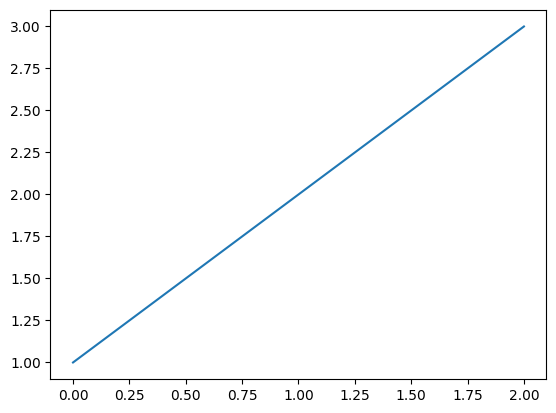

In [3]:
import matplotlib.pyplot as plt
print(lis)
plt.plot(lis)

In [4]:
lis = [-49.8196748283246, -50.44799302251776, -50.44799302251776, -50.44799302251776, -50.44799302251776, -51.22499389946279, -50.44799302251776, -50.44799302251776, -50.44799302251776, -51.22499389946279, -51.22499389946279, -50.60632371551998, -49.20365840057018, -48.60041152089147, -48.60041152089147, -48.60041152089147, -48.60041152089147, -47.43416490252569, -46.87216658103186, -46.32493928760188, -46.87216658103186, -46.32493928760188, -45.79301256742124, -46.32493928760188, -46.32493928760188, -46.32493928760188, -47.43416490252569, -47.43416490252569, -48.010415536631214, -48.010415536631214, -48.60041152089147, -48.60041152089147, -48.60041152089147, -48.010415536631214, -48.60041152089147, -48.60041152089147, -49.20365840057018, -49.8196748283246, -49.8196748283246, -49.8196748283246, -49.8196748283246, -49.8196748283246, -49.20365840057018, -48.010415536631214, -48.60041152089147, -49.20365840057018, -48.60041152089147, -48.010415536631214, -49.20365840057018, -49.20365840057018, -48.60041152089147, -48.010415536631214, -48.010415536631214, -48.010415536631214, -47.43416490252569, -47.43416490252569, -47.43416490252569, -48.010415536631214, -47.43416490252569, -47.43416490252569, -46.87216658103186, -45.79301256742124, -45.27692569068709, -45.79301256742124, -45.79301256742124, -45.79301256742124, -46.32493928760188, -46.32493928760188, -46.32493928760188, -47.43416490252569, -47.43416490252569, -46.32493928760188, -44.77722635447622, -44.77722635447622, -45.27692569068709, -44.77722635447622, -44.77722635447622, -44.294469180700204, -44.294469180700204, -43.41658669218482, -42.941821107167776, -42.485291572496, -42.485291572496, -42.941821107167776, -45.27692569068709, -45.27692569068709, -45.79301256742124, -46.87216658103186, -47.43416490252569, -46.87216658103186, -46.87216658103186, -47.43416490252569, -47.43416490252569, -46.87216658103186, -46.87216658103186, -45.79301256742124, -45.27692569068709, -44.294469180700204, -44.77722635447622, -44.77722635447622, -42.485291572496, -42.485291572496, -42.485291572496, -42.04759208325728, -42.04759208325728, -42.04759208325728, -42.04759208325728, -42.04759208325728, -42.04759208325728, -42.04759208325728, -40.311288741492746, -40.718546143004666, -41.6293165929973, -41.6293165929973, -42.485291572496, -42.485291572496, -42.941821107167776, -42.04759208325728, -41.6293165929973, -42.485291572496, -42.941821107167776, -42.941821107167776, -42.941821107167776, -44.294469180700204, -44.294469180700204, -44.294469180700204, -44.294469180700204, -44.77722635447622, -44.294469180700204, -44.294469180700204, -44.294469180700204, -44.294469180700204, -44.294469180700204, -44.294469180700204, -44.77722635447622, -45.79301256742124, -45.79301256742124, -45.27692569068709, -45.27692569068709, -45.79301256742124, -45.79301256742124, -45.79301256742124, -45.79301256742124, -45.27692569068709, -45.27692569068709, -45.79301256742124, -45.27692569068709, -45.27692569068709, -45.27692569068709, -45.79301256742124, -45.27692569068709, -45.27692569068709, -44.77722635447622, -43.41658669218482, -43.41658669218482, -43.41658669218482, -44.77722635447622, -42.941821107167776, -42.941821107167776, -43.41658669218482, -44.294469180700204, -44.294469180700204, -43.41658669218482, -43.41658669218482, -43.41658669218482, -42.941821107167776, -42.04759208325728, -40.718546143004666, -40.718546143004666, -40.311288741492746, -39.92492955535426, -39.56008088970496, -39.56008088970496, -39.56008088970496, -39.56008088970496, -38.27531841800928, -37.94733192202055, -37.94733192202055, -37.94733192202055, -38.27531841800928, -38.27531841800928, -37.94733192202055, -37.64306044943742, -36.68787265568828, -36.68787265568828, -36.68787265568828, -37.64306044943742, -36.138621999185304, -35.90264614203248, -36.138621999185304, -36.40054944640259, -36.138621999185304, -35.90264614203248, -34.92849839314596, -34.713109915419565, -34.713109915419565, -34.713109915419565, -34.713109915419565, -34.713109915419565, -33.54101966249684, -38.27531841800928, -33.37663853655727, -31.016124838541646, -31.064449134018133, -31.144823004794873, -31.064449134018133, -31.064449134018133, -30.01666203960727, -30.01666203960727, -30.01666203960727, -31.064449134018133, -31.016124838541646, -30.0, -30.0, -30.0, -30.0, -30.01666203960727, -30.01666203960727, -30.01666203960727, -31.016124838541646, -31.064449134018133, -32.2490309931942, -33.24154027718932, -32.14031735997639, -31.064449134018133, -31.016124838541646, -30.01666203960727, -30.01666203960727, -30.01666203960727, -30.01666203960727, -30.0, -29.0, -30.0, -30.01666203960727, -30.01666203960727, -30.01666203960727, -30.01666203960727, -29.0, -29.0, -29.0, -29.017236257093817, -29.0, -30.01666203960727, -31.064449134018133, -31.064449134018133, -32.14031735997639, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.14031735997639, -32.14031735997639, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.14031735997639, -32.14031735997639, -32.14031735997639, -32.14031735997639, -32.14031735997639, -32.2490309931942, -33.54101966249684, -34.92849839314596, -36.138621999185304, -36.138621999185304, -36.138621999185304, -36.138621999185304, -35.90264614203248, -35.90264614203248, -35.90264614203248, -34.713109915419565, -34.52535300326414, -34.713109915419565, -34.713109915419565, -34.92849839314596, -36.40054944640259, -36.40054944640259, -36.40054944640259, -37.64306044943742, -37.64306044943742, -37.64306044943742, -37.36308338453881, -37.94733192202055, -37.94733192202055, -38.27531841800928, -39.21734310225516, -37.94733192202055, -37.94733192202055, -37.64306044943742, -36.40054944640259, -36.138621999185304, -35.90264614203248, -35.90264614203248, -36.138621999185304, -36.138621999185304, -36.138621999185304, -36.40054944640259, -34.92849839314596, -33.54101966249684, -33.54101966249684, -34.713109915419565, -34.92849839314596, -34.713109915419565, -34.713109915419565, -36.138621999185304, -37.64306044943742, -37.94733192202055, -39.21734310225516, -39.21734310225516, -38.27531841800928, -37.94733192202055, -37.94733192202055, -37.64306044943742, -37.36308338453881, -36.40054944640259, -37.36308338453881, -36.40054944640259, -36.40054944640259, -37.64306044943742, -37.94733192202055, -39.21734310225516, -39.21734310225516, -37.94733192202055, -37.94733192202055, -37.94733192202055, -37.94733192202055, -37.94733192202055, -37.64306044943742, -36.40054944640259, -36.40054944640259, -36.40054944640259, -36.138621999185304, -34.92849839314596, -33.54101966249684, -33.37663853655727, -32.2490309931942, -31.144823004794873, -32.14031735997639, -32.2490309931942, -32.14031735997639, -32.2490309931942, -33.37663853655727, -33.54101966249684, -33.37663853655727, -33.37663853655727, -33.37663853655727, -33.54101966249684, -34.713109915419565, -34.713109915419565, -33.54101966249684, -32.2490309931942, -32.2490309931942, -32.2490309931942, -32.38826948140329, -32.38826948140329, -33.54101966249684, -33.734255586866, -34.713109915419565, -34.92849839314596, -35.17101079013795, -34.92849839314596, -34.713109915419565, -33.734255586866, -33.734255586866, -34.713109915419565, -34.713109915419565, -34.92849839314596, -34.713109915419565, -34.713109915419565, -33.734255586866, -33.734255586866, -34.713109915419565, -34.713109915419565, -34.92849839314596, -34.92849839314596, -34.92849839314596, -33.734255586866, -33.734255586866, -33.734255586866, -32.38826948140329, -32.38826948140329, -33.54101966249684, -33.54101966249684, -32.38826948140329, -33.734255586866, -33.734255586866, -33.734255586866, -33.54101966249684, -33.54101966249684, -32.38826948140329, -32.55764119219941, -32.55764119219941, -33.54101966249684, -32.55764119219941, -33.54101966249684, -34.92849839314596, -34.92849839314596, -32.38826948140329, -32.38826948140329, -32.55764119219941, -32.38826948140329, -32.38826948140329, -31.400636936215164, -31.25699921617557, -31.400636936215164, -31.400636936215164, -32.38826948140329, -31.400636936215164, -31.25699921617557, -31.25699921617557, -32.38826948140329, -32.55764119219941, -32.38826948140329, -31.25699921617557, -31.25699921617557, -31.25699921617557, -30.265491900843113, -31.400636936215164, -31.400636936215164, -31.400636936215164, -31.575306807693888, -31.400636936215164, -31.400636936215164, -30.4138126514911, -31.400636936215164, -31.400636936215164, -31.400636936215164, -31.575306807693888, -31.575306807693888, -31.575306807693888, -31.575306807693888, -31.575306807693888, -31.575306807693888, -32.7566787083184, -32.7566787083184, -32.7566787083184, -33.95585369269929, -33.95585369269929, -32.7566787083184, -31.575306807693888, -31.400636936215164, -30.4138126514911, -30.265491900843113, -31.400636936215164, -31.400636936215164, -31.400636936215164, -31.400636936215164, -31.400636936215164, -31.400636936215164, -31.400636936215164, -30.265491900843113, -29.154759474226502, -29.154759474226502, -29.068883707497267, -28.071337695236398, -28.071337695236398, -28.160255680657446, -29.274562336608895, -30.265491900843113, -30.265491900843113, -29.154759474226502, -29.154759474226502, -29.154759474226502, -29.068883707497267, -29.154759474226502, -29.154759474226502, -29.154759474226502, -30.14962686336267, -31.25699921617557, -31.25699921617557, -31.25699921617557, -31.25699921617557, -30.265491900843113, -30.14962686336267, -30.14962686336267, -30.14962686336267, -29.068883707497267, -29.068883707497267, -29.068883707497267, -29.154759474226502, -29.068883707497267, -28.071337695236398, -28.071337695236398, -28.0178514522438, -27.018512172212592, -26.0, -27.0, -28.0178514522438, -28.071337695236398, -29.068883707497267, -30.14962686336267, -30.066592756745816, -29.068883707497267, -30.14962686336267, -30.066592756745816, -30.14962686336267]

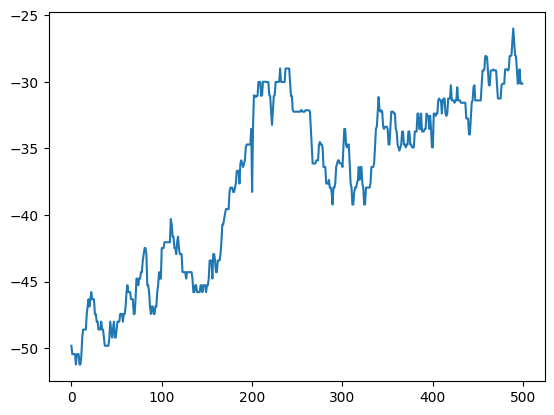

In [8]:
plt.plot(lis)
episode = 10
file_name = './img' + str(episode) + '.png'
plt.savefig(file_name)
plt.close()

In [7]:
episode = 10
file_name = './img' + str(episode) + '.png'
plt.savefig(file_name)

<Figure size 640x480 with 0 Axes>